### We use logistic regression to predict whether a person survived on the Titanic.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
#from sklearn.metrics import (precision_recall_curve, PrecisionRecallDisplay)

In [2]:
train = pd.read_csv('train2.csv')
test = pd.read_csv('test2.csv')

In [4]:
#variables = ['Pclass_2', 'Pclass_3', 'Sex', 'Age', 'HasFamily', 'Embarked_Q', 'Embarked_S', 'FareOverHundred']
variables = ['AgeBin', 'Sex', 'Pclass', 'HasRelatives']
#variables = ['AgeBin', 'Sex']
y = train['Survived']
X = np.array(train[variables])
print(X.shape, y.shape)

(891, 4) (891,)


In [5]:
Xtest = np.array(test[variables])
testlabeled = test[variables].copy()

In [6]:
clf = LogisticRegression(random_state = 1, C = 0.6, max_iter = 500).fit(X, y)
print(clf.score(X, y))

0.797979797979798


In [7]:
clf.fit(X, y)

LogisticRegression(C=0.6, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### The training accuracy is only 80%. 

In [72]:
pred1 = clf1.predict(Xtest)

In [73]:
testlabeled['Survived1'] = pred1
testlabeled.head()

,AgeBin,Sex,Pclass,HasFamily,Survived1
0,1,1,3,0,0
1,1,0,3,1,1
2,1,1,2,0,0
3,1,1,3,0,0
4,1,0,3,1,1


In [74]:
testlabeled.groupby('Sex').agg({'Survived1': 'mean'})

,Survived1
Sex,
0,1.000000
1,0.003759


In [51]:
submission = pd.read_csv('gender_submission.csv')
submission['Survived'] = pred1
submission.to_csv('submission1.csv', index = False)

### We now try to implement a decision tree.

In [75]:
clf2 = tree.DecisionTreeClassifier(ccp_alpha = 0, max_features = 'auto', criterion = 'entropy', 
                                   min_impurity_decrease = 0)
clf2.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [76]:
pred2 = clf2.predict(Xtest)
testlabeled['Survived2'] = pred2

In [77]:
testlabeled.groupby('Sex').agg({'Survived2': 'mean'})

,Survived2
Sex,
0,0.822368
1,0.003759


In [78]:
error = np.mean(np.abs(clf2.predict(X) - y))
print(1 - error)

0.8215488215488216


[Text(162.32727272727274, 199.32, 'X[1] <= 0.5\nentropy = 0.961\nsamples = 891\nvalue = [549, 342]'),
 Text(93.84545454545456, 163.07999999999998, 'X[2] <= 2.5\nentropy = 0.824\nsamples = 314\nvalue = [81, 233]'),
 Text(45.654545454545456, 126.83999999999999, 'X[0] <= 0.5\nentropy = 0.299\nsamples = 170\nvalue = [9, 161]'),
 Text(20.290909090909093, 90.6, 'X[2] <= 1.5\nentropy = 0.65\nsamples = 6\nvalue = [1, 5]'),
 Text(10.145454545454546, 54.359999999999985, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(30.436363636363637, 54.359999999999985, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(71.01818181818183, 90.6, 'X[3] <= 0.5\nentropy = 0.281\nsamples = 164\nvalue = [8, 156]'),
 Text(50.727272727272734, 54.359999999999985, 'X[2] <= 1.5\nentropy = 0.33\nsamples = 66\nvalue = [4, 62]'),
 Text(40.581818181818186, 18.119999999999976, 'entropy = 0.191\nsamples = 34\nvalue = [1, 33]'),
 Text(60.872727272727275, 18.119999999999976, 'entropy = 0.449\nsamples = 32\nvalue = [3, 29

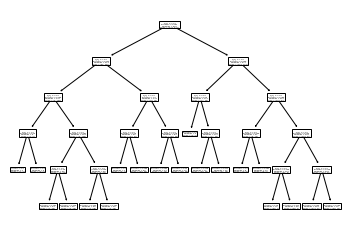

In [79]:
tree.plot_tree(clf2)

In [45]:
#import graphviz 
#dot_data = tree.export_graphviz(clf2, out_file = None) 
#graph = graphviz.Source(dot_data) 
#graph.render("titanic")

In [80]:
from sklearn.tree import export_text
r = export_text(clf2)
print(r)

|--- feature_1 <= 0.50
|   |--- feature_2 <= 2.50
|   |   |--- feature_0 <= 0.50
|   |   |   |--- feature_2 <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_2 >  1.50
|   |   |   |   |--- class: 1
|   |   |--- feature_0 >  0.50
|   |   |   |--- feature_3 <= 0.50
|   |   |   |   |--- feature_2 <= 1.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  1.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  0.50
|   |   |   |   |--- feature_2 <= 1.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  1.50
|   |   |   |   |   |--- class: 1
|   |--- feature_2 >  2.50
|   |   |--- feature_3 <= 0.50
|   |   |   |--- feature_0 <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  0.50
|   |   |   |   |--- class: 1
|   |   |--- feature_3 >  0.50
|   |   |   |--- feature_0 <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  0.50
|   |   |   |   |--- class: 0
|--- feature_1 >  0.50
|   |--- feature_2 <= 1.

In [81]:
submission = pd.read_csv('gender_submission.csv')
submission['Survived'] = pred2
submission.to_csv('submission2.csv', index = False)

### We try a random forest.

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
clf3 = RandomForestClassifier(max_depth = 4, random_state = 0)

In [59]:
clf3.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [60]:
pred3 = clf3.predict(Xtest)
testlabeled['Survived3'] = pred3;

In [61]:
clf3.score(X, y)

0.8338945005611672

### Submission

In [62]:
submission = pd.read_csv('gender_submission.csv')
submission['Survived'] = pred3
submission.to_csv('submission3.csv', index = False)

In [63]:
print(sum(testlabeled['Survived1'] != testlabeled['Survived2']))
print(sum(testlabeled['Survived2'] != testlabeled['Survived3']))
print(sum(testlabeled['Survived3'] != testlabeled['Survived1']))

84
63
41
